In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

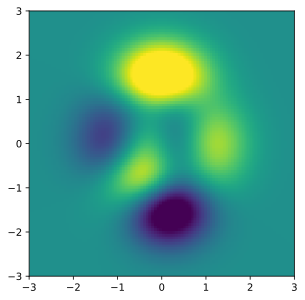

In [ ]:
# create the landscape
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

Z = peaks(x,y)

# let's have a look
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [ ]:
# create the derivative using sympy
sx,sy = sym.symbols('sx, sy')
sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
    - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
    - 1/3*sym.exp(-(sx+1)**2 - sy**2) # recreate f(x) in sym bc up there it is np

# cerate functions from the sympy-computed derivativs
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )
# sym.labdaify will transform a sympy object into a function that we can call
df_x(1,1).evalf()

-1.07369833656079

[0.296445553846832 0.320196247666835]
[0, 1.4]


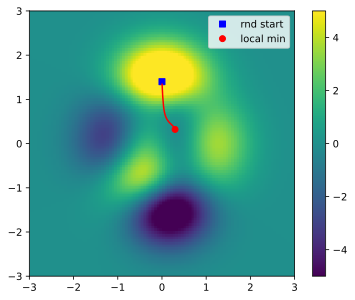

In [ ]:
# random starting point (uniform btw -2 and +2)
localmin = [0,1.4]# np.random.rand(2)*4-2 # also try specifiying coords
startpnt = localmin[:]

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad # !!!!!!!
  trajectory[i,:] = localmin

print(localmin)
print(startpnt)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

In [ ]:
# 1) Modify the code to force the initial guess to be [0,1.4]. Does the model reach a reasonable local minimum?
#
# 2) Using the same starting point, change the number of training epochs to 10,000. Does the final solution differ from
#    using 1000 epochs?
#
# 3) (Again with the same starting location) Change the learning to .1 (1000 epochs). What do you notice about the trajectory?
#    Try again with the learning rate set to .5, and then to .00001.
#